In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-lognormal-2nd"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_2/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

11:39 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2/'
11:39 bilby INFO    : Search parameters:
11:39 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
11:39 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
11:39 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
11:39 bilby INFO    :   H0 = 67.4
11:39 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:79: RuntimeWarning: divide by zero encountered in log
11:40 bilby INFO    : Single likelihood evaluation took 6.488e-01 s


0it [00:00, ?it/s]

11:40 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f81e85e5f70>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
11:40 bilby INFO    : Checkpoint every check_point_delta_t = 60s
11:40 bilby INFO    : Using dynesty version 1.0.1
11:40 bilby INFO    : Using the bilby-implemented rwalk sampl

793it [12:14,  5.39it/s, bound:0 nc: 14 ncall:2.5e+03 eff:31.5% logz=-1900.36+/-0.15 dlogz:143.643>0.1]     

11:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1078it [13:38,  1.94it/s, bound:0 nc: 48 ncall:4.5e+03 eff:23.8% logz=-1851.46+/-0.15 dlogz:94.765>0.1] 

11:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1262it [15:04,  2.14it/s, bound:0 nc: 31 ncall:6.6e+03 eff:19.2% logz=-1833.00+/-0.14 dlogz:75.867>0.1]

11:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1384it [16:30,  1.38it/s, bound:0 nc:  3 ncall:8.6e+03 eff:16.2% logz=-1824.14+/-0.15 dlogz:66.743>0.1]

11:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1483it [17:57,  1.23it/s, bound:0 nc: 33 ncall:1.1e+04 eff:14.0% logz=-1818.14+/-0.15 dlogz:60.827>0.1]

11:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1569it [19:23,  1.04it/s, bound:0 nc: 37 ncall:1.3e+04 eff:12.4% logz=-1812.63+/-0.15 dlogz:55.296>0.1]

11:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1647it [20:52,  1.18s/it, bound:0 nc: 87 ncall:1.5e+04 eff:11.2% logz=-1808.25+/-0.15 dlogz:50.763>0.1]

12:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1721it [22:20,  2.41s/it, bound:0 nc:104 ncall:1.7e+04 eff:10.2% logz=-1804.49+/-0.15 dlogz:46.862>0.1]

12:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1741it [23:29, 10.93s/it, bound:1 nc: 53 ncall:1.7e+04 eff:10.0% logz=-1803.25+/-0.15 dlogz:46.176>0.1]

12:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1802it [24:54,  1.76s/it, bound:7 nc: 32 ncall:2.0e+04 eff:9.2% logz=-1800.09+/-0.15 dlogz:42.897>0.1] 

12:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1864it [26:09,  1.36s/it, bound:14 nc: 26 ncall:2.2e+04 eff:8.5% logz=-1796.47+/-0.15 dlogz:39.206>0.1]

12:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1926it [27:32,  1.36s/it, bound:20 nc: 30 ncall:2.4e+04 eff:8.1% logz=-1793.78+/-0.15 dlogz:36.397>0.1]

12:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1985it [28:55,  1.43s/it, bound:28 nc: 37 ncall:2.6e+04 eff:7.7% logz=-1791.32+/-0.15 dlogz:33.809>0.1]

12:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2042it [30:21,  1.49s/it, bound:35 nc: 37 ncall:2.8e+04 eff:7.3% logz=-1789.00+/-0.16 dlogz:31.369>0.1]

12:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2104it [31:46,  1.42s/it, bound:41 nc: 34 ncall:3.0e+04 eff:7.0% logz=-1786.83+/-0.16 dlogz:29.072>0.1]

12:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2166it [33:12,  1.49s/it, bound:48 nc: 36 ncall:3.2e+04 eff:6.7% logz=-1784.78+/-0.16 dlogz:26.894>0.1]

12:13 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2228it [34:37,  1.49s/it, bound:55 nc: 33 ncall:3.5e+04 eff:6.4% logz=-1783.20+/-0.15 dlogz:25.182>0.1]

12:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2289it [36:02,  1.49s/it, bound:62 nc: 32 ncall:3.7e+04 eff:6.2% logz=-1781.58+/-0.16 dlogz:23.653>0.1]

12:16 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2343it [37:29,  1.60s/it, bound:69 nc: 35 ncall:3.9e+04 eff:6.0% logz=-1780.30+/-0.16 dlogz:22.263>0.1]

12:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2400it [38:58,  1.62s/it, bound:76 nc: 38 ncall:4.1e+04 eff:5.8% logz=-1779.08+/-0.16 dlogz:20.919>0.1]

12:19 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2463it [40:30,  1.51s/it, bound:84 nc: 40 ncall:4.4e+04 eff:5.6% logz=-1777.83+/-0.16 dlogz:19.547>0.1]

12:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2526it [42:00,  1.54s/it, bound:92 nc: 32 ncall:4.6e+04 eff:5.5% logz=-1776.59+/-0.16 dlogz:18.181>0.1]

12:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2589it [43:32,  1.52s/it, bound:99 nc: 32 ncall:4.9e+04 eff:5.3% logz=-1775.46+/-0.16 dlogz:16.915>0.1]

12:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2653it [45:03,  1.46s/it, bound:107 nc: 38 ncall:5.1e+04 eff:5.2% logz=-1774.30+/-0.16 dlogz:15.631>0.1]

12:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2714it [46:37,  1.56s/it, bound:115 nc: 39 ncall:5.4e+04 eff:5.1% logz=-1773.29+/-0.16 dlogz:14.499>0.1]

12:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2776it [48:10,  1.54s/it, bound:123 nc: 39 ncall:5.6e+04 eff:5.0% logz=-1772.43+/-0.16 dlogz:13.509>0.1]

12:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2836it [49:44,  1.62s/it, bound:131 nc: 80 ncall:5.9e+04 eff:4.8% logz=-1771.69+/-0.16 dlogz:12.652>0.1]

12:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2898it [51:18,  1.58s/it, bound:139 nc: 40 ncall:6.1e+04 eff:4.7% logz=-1771.01+/-0.16 dlogz:11.843>0.1]

12:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2959it [52:51,  1.64s/it, bound:147 nc: 40 ncall:6.4e+04 eff:4.6% logz=-1770.36+/-0.16 dlogz:11.075>0.1]

12:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3018it [54:25,  1.64s/it, bound:155 nc: 40 ncall:6.6e+04 eff:4.6% logz=-1769.79+/-0.16 dlogz:10.389>0.1]

12:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3082it [55:59,  1.62s/it, bound:163 nc: 40 ncall:6.9e+04 eff:4.5% logz=-1769.22+/-0.16 dlogz:9.686>0.1] 

12:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3146it [57:34,  1.56s/it, bound:171 nc: 40 ncall:7.1e+04 eff:4.4% logz=-1768.67+/-0.16 dlogz:9.013>0.1]

12:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3204it [59:08,  1.72s/it, bound:179 nc: 40 ncall:7.4e+04 eff:4.3% logz=-1768.19+/-0.16 dlogz:8.411>0.1]

12:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3264it [1:00:43,  1.68s/it, bound:187 nc: 40 ncall:7.6e+04 eff:4.3% logz=-1767.73+/-0.16 dlogz:7.884>0.1]

12:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3325it [1:02:17,  1.59s/it, bound:195 nc: 40 ncall:7.9e+04 eff:4.2% logz=-1767.32+/-0.16 dlogz:7.354>0.1]

12:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3387it [1:03:52,  1.60s/it, bound:203 nc: 40 ncall:8.2e+04 eff:4.2% logz=-1766.92+/-0.16 dlogz:6.825>0.1]

12:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3450it [1:05:26,  1.54s/it, bound:211 nc: 40 ncall:8.4e+04 eff:4.1% logz=-1766.53+/-0.17 dlogz:6.310>0.1]

12:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3512it [1:07:01,  1.62s/it, bound:219 nc: 40 ncall:8.7e+04 eff:4.1% logz=-1766.18+/-0.17 dlogz:5.841>0.1]

12:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3573it [1:08:36,  1.58s/it, bound:227 nc: 40 ncall:8.9e+04 eff:4.0% logz=-1765.87+/-0.17 dlogz:5.410>0.1]

12:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3636it [1:10:09,  1.61s/it, bound:235 nc: 40 ncall:9.2e+04 eff:4.0% logz=-1765.59+/-0.17 dlogz:5.000>0.1]

12:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3698it [1:11:43,  1.59s/it, bound:243 nc: 40 ncall:9.4e+04 eff:3.9% logz=-1765.33+/-0.17 dlogz:4.622>0.1]

12:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
12:52 bilby INFO    : Writing 109 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3761it [1:13:18,  1.62s/it, bound:251 nc: 40 ncall:9.7e+04 eff:3.9% logz=-1765.07+/-0.17 dlogz:4.241>0.1]

12:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
12:53 bilby INFO    : Writing 114 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3824it [1:14:52,  1.58s/it, bound:259 nc: 40 ncall:9.9e+04 eff:3.8% logz=-1764.83+/-0.17 dlogz:3.882>0.1]

12:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
12:55 bilby INFO    : Writing 135 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3888it [1:16:28,  1.63s/it, bound:267 nc: 40 ncall:1.0e+05 eff:3.8% logz=-1764.61+/-0.17 dlogz:3.540>0.1]

12:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
12:56 bilby INFO    : Writing 145 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3950it [1:18:03,  1.61s/it, bound:275 nc: 40 ncall:1.0e+05 eff:3.8% logz=-1764.41+/-0.17 dlogz:3.231>0.1]

12:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
12:58 bilby INFO    : Writing 146 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4012it [1:19:38,  1.56s/it, bound:283 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1764.24+/-0.17 dlogz:2.944>0.1]

12:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
12:59 bilby INFO    : Writing 190 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4074it [1:21:13,  1.60s/it, bound:291 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1764.07+/-0.17 dlogz:2.702>0.1]

13:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:01 bilby INFO    : Writing 185 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4136it [1:22:48,  1.56s/it, bound:299 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1763.92+/-0.17 dlogz:2.450>0.1]

13:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:03 bilby INFO    : Writing 227 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4198it [1:24:23,  1.61s/it, bound:307 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1763.79+/-0.17 dlogz:2.214>0.1]

13:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:04 bilby INFO    : Writing 237 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4257it [1:25:58,  1.63s/it, bound:314 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.66+/-0.17 dlogz:2.002>0.1]

13:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:06 bilby INFO    : Writing 288 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4319it [1:27:34,  1.65s/it, bound:322 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.55+/-0.17 dlogz:1.797>0.1]

13:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:07 bilby INFO    : Writing 310 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4382it [1:29:08,  1.58s/it, bound:330 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.44+/-0.17 dlogz:1.605>0.1]

13:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:09 bilby INFO    : Writing 370 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4446it [1:30:43,  1.60s/it, bound:338 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1763.33+/-0.17 dlogz:1.425>0.1]

13:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:11 bilby INFO    : Writing 409 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4506it [1:32:17,  1.62s/it, bound:346 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1763.25+/-0.17 dlogz:1.271>0.1]

13:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:12 bilby INFO    : Writing 491 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4567it [1:33:52,  1.68s/it, bound:354 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1763.16+/-0.17 dlogz:1.129>0.1]

13:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:14 bilby INFO    : Writing 483 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4631it [1:35:28,  1.60s/it, bound:362 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1763.09+/-0.17 dlogz:0.995>0.1]

13:15 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:15 bilby INFO    : Writing 588 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4693it [1:37:03,  1.55s/it, bound:370 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1763.02+/-0.17 dlogz:0.880>0.1]

13:17 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:17 bilby INFO    : Writing 697 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4755it [1:38:38,  1.58s/it, bound:378 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.96+/-0.17 dlogz:0.776>0.1]

13:18 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:18 bilby INFO    : Writing 681 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4815it [1:40:12,  1.59s/it, bound:386 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.91+/-0.17 dlogz:0.687>0.1]

13:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:20 bilby INFO    : Writing 841 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4878it [1:41:48,  1.61s/it, bound:394 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.86+/-0.17 dlogz:0.603>0.1]

13:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:22 bilby INFO    : Writing 941 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4938it [1:43:24,  1.62s/it, bound:402 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1762.82+/-0.17 dlogz:0.533>0.1]

13:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:23 bilby INFO    : Writing 1100 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5001it [1:45:00,  1.62s/it, bound:410 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1762.78+/-0.17 dlogz:0.468>0.1]

13:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:25 bilby INFO    : Writing 1169 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5061it [1:46:35,  1.62s/it, bound:418 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1762.74+/-0.17 dlogz:0.413>0.1]

13:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:26 bilby INFO    : Writing 1413 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5120it [1:48:12,  1.72s/it, bound:426 nc: 40 ncall:1.5e+05 eff:3.3% logz=-1762.71+/-0.17 dlogz:0.365>0.1]

13:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:28 bilby INFO    : Writing 1532 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5181it [1:49:47,  1.64s/it, bound:434 nc: 80 ncall:1.6e+05 eff:3.3% logz=-1762.68+/-0.17 dlogz:0.322>0.1]

13:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:30 bilby INFO    : Writing 1564 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5242it [1:51:22,  1.68s/it, bound:442 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.66+/-0.17 dlogz:0.283>0.1]

13:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:31 bilby INFO    : Writing 1583 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5304it [1:52:56,  1.61s/it, bound:450 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.64+/-0.17 dlogz:0.249>0.1]

13:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:33 bilby INFO    : Writing 1548 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5365it [1:54:30,  1.66s/it, bound:458 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.61+/-0.17 dlogz:0.219>0.1]

13:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:34 bilby INFO    : Writing 1578 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5428it [1:56:04,  1.58s/it, bound:466 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1762.59+/-0.17 dlogz:0.192>0.1]

13:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:36 bilby INFO    : Writing 1633 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5490it [1:57:38,  1.53s/it, bound:474 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1762.58+/-0.17 dlogz:0.169>0.1]

13:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:37 bilby INFO    : Writing 1552 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5552it [1:59:12,  1.56s/it, bound:482 nc: 40 ncall:1.7e+05 eff:3.2% logz=-1762.56+/-0.17 dlogz:0.148>0.1]

13:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:39 bilby INFO    : Writing 1557 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5614it [2:00:46,  1.53s/it, bound:490 nc: 40 ncall:1.7e+05 eff:3.2% logz=-1762.55+/-0.17 dlogz:0.131>0.1]

13:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:41 bilby INFO    : Writing 1580 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5674it [2:02:20,  1.61s/it, bound:498 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1762.54+/-0.17 dlogz:0.116>0.1]

13:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:42 bilby INFO    : Writing 1565 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5736it [2:03:54,  1.56s/it, bound:506 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1762.53+/-0.17 dlogz:0.102>0.1]

13:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:44 bilby INFO    : Writing 1544 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5744it [2:03:58,  1.42s/it, bound:507 nc:  1 ncall:1.8e+05 eff:3.2% logz=-1762.52+/-0.17 dlogz:0.100>0.1]

13:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_resume.pickle
13:44 bilby INFO    : Writing 1568 current samples to H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
13:44 bilby INFO    : Starting to close worker pool.
13:44 bilby INFO    : Finished closing worker pool.


5744it [2:04:00,  1.30s/it, bound:507 nc:  1 ncall:1.8e+05 eff:3.5% logz=-1762.44+/-0.18 dlogz:0.000>0.1]



13:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
13:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
13:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
13:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
13:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
13:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
13:44 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
13:44 bilby INFO    : Sampling time: 1:53:09.948339
13:44 bilby INFO    : Summary of results:
nsamples: 6244
ln_noise_evidence:    nan
ln_evidence: -1762.438 +/-  0.177
ln_bayes_fac

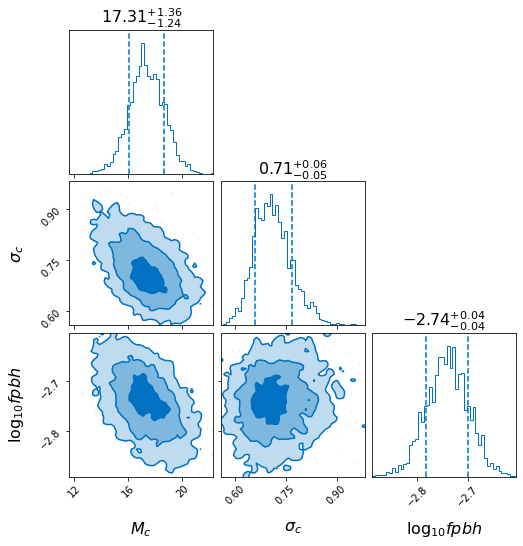

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [7]:
import numpy as np
np.exp(-1055.256-(-1055.152))

0.9012252974211671

In [8]:
10**(-2.69)

0.0020417379446695297

In [9]:
import numpy as np
np.exp(-1055.256-(-1060.368))

166.00202714516672